# **Mount Drive**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


# **Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
!pip install -q keras
from keras.utils import to_categorical
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
# from keras.layers.normalization import BatchNormalization
from keras import optimizers
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Reshape, LayerNormalization, MultiHeadAttention,Concatenate
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv1D, GlobalMaxPooling1D, Activation, Dense, Dropout, Lambda
from keras.utils import to_categorical

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import load_model
!pip install -q pycm
import pycm
from pycm import *
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# **Import Dataset From Drive**

In [3]:
train='/kaggle/input/nslkdd/KDDTrain+.txt'
test='/kaggle/input/nslkdd/KDDTest+.txt'
test21='/kaggle/input/nslkdd/KDDTest-21.txt'

# **Preparing Dataset**

In [4]:
featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}

In [5]:
train_data=pd.read_csv(train,names=featureV)
test_data=pd.read_csv(test,names=featureV)
test_21 = pd.read_csv(test21, names= featureV)

# **Heatmap**

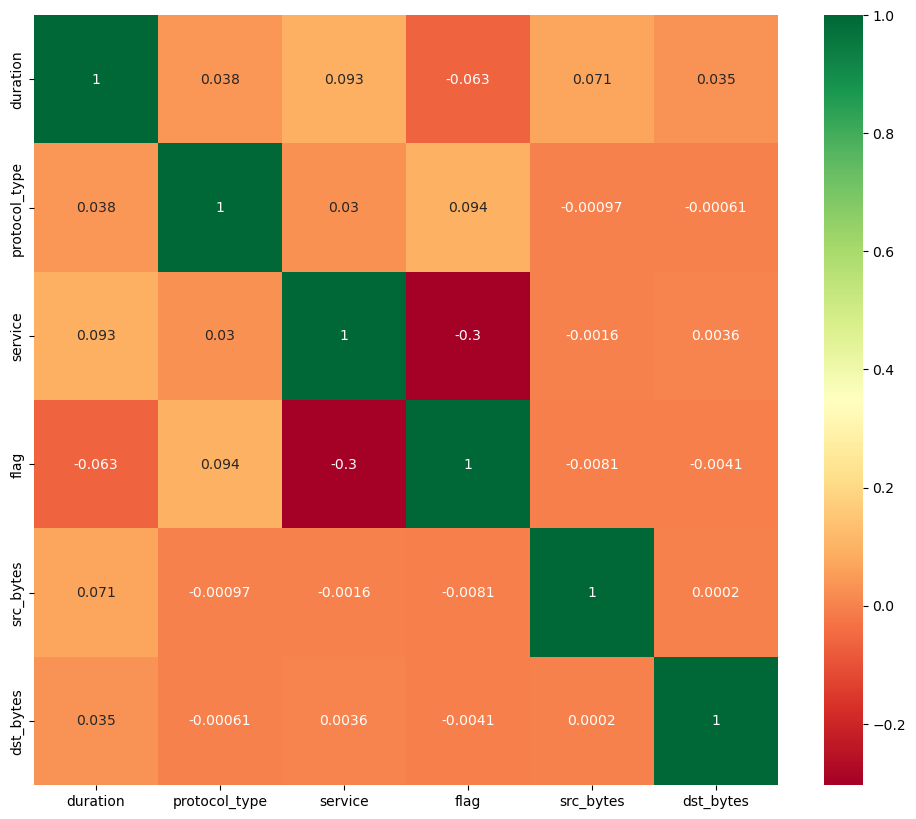

In [6]:
heatmap = pd.read_csv(train,names=featureV)
cat_cols = ["protocol_type", "service", "flag"]
le = LabelEncoder()
for col in cat_cols:
    heatmap[col] = le.fit_transform(heatmap[col])

train_data_heatmap = heatmap[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes']]

plt.figure(figsize=(12,10))
p=sns.heatmap(train_data_heatmap.corr(), annot=True,cmap ='RdYlGn') 

# **Data Preprocessing**

In [7]:
train_data = train_data.drop_duplicates()
train_data = train_data.dropna()

test_data = test_data.drop_duplicates()
test_data = test_data.dropna()

test_21 = test_21.drop_duplicates()
test_21 = test_21.dropna()

# **Hybrid Feature Selection**

In [8]:
train_data = train_data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'label']]

# One-hot encode the categorical data
train_data = pd.get_dummies(train_data, columns=['protocol_type', 'service', 'flag'])

test_data = test_data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'label']]

# One-hot encode the categorical data
test_data = pd.get_dummies(test_data, columns=['protocol_type', 'service', 'flag'])

test_21 = test_21[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'label']]

# One-hot encode the categorical data
test_21 = pd.get_dummies(test_21, columns=['protocol_type', 'service', 'flag'])

In [9]:
test_data['dummy1'] = 0
test_data['dummy2'] = 0
test_data['dummy3'] = 0
test_data['dummy4'] = 0
test_data['dummy5'] = 0
test_data['dummy6'] = 0

# <<-------------------------------------------------------------------------------->>

test_21['dummy1'] = 0
test_21['dummy2'] = 0
test_21['dummy3'] = 0
test_21['dummy4'] = 0
test_21['dummy5'] = 0
test_21['dummy6'] = 0
test_21['dummy7'] = 0
test_21['dummy8'] = 0

In [10]:
print(np.shape(train_data))
print(np.shape(test_data))
print(np.shape(test_21))

(125973, 88)
(22544, 88)
(11850, 88)


In [11]:
def preprocessing(data,cls,df):
  
#----------attack categorization----------------->
  data['label']=data['label'].replace(['normal.','normal'],0)

#----------------------binary classification--------------------->
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['label'] = data['label'].replace(binary_attack[i], 1)
  
#---------------multiclass classification-------------------->  
  elif cls=='multiclass':
    for i in range(len(multiclass_attack['probe'])):
      data['label']=data['label'].replace([multiclass_attack['probe'][i],multiclass_attack['probe'][i][:-1]],1)
    
    for i in range(len(multiclass_attack['dos'])):
      data['label']=data['label'].replace([multiclass_attack['dos'][i],multiclass_attack['dos'][i][:-1]],2)
    
    for i in range(len(multiclass_attack['u2r'])):
      data['label']=data['label'].replace([multiclass_attack['u2r'][i],multiclass_attack['u2r'][i][:-1]],3)
    
    for i in range(len(multiclass_attack['r2l'])):
      data['label'] = data['label'].replace([multiclass_attack['r2l'][i],multiclass_attack['r2l'][i][:-1]],4)
#------------------------------------------------>


#-------------------------splitting features and labels---------------->
  y=data['label']
  x=data.iloc[:, :-1]

#-----------------converting to binary label vectors--------------------------------------> 
  yt=y.copy()
  yt=pd.get_dummies(yt)
#------------------------------------------------------------------------------>

  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
    
  return x,yt

In [12]:
x_train,Y_train=preprocessing(train_data,cls='multiclass',df='train')
x_test,Y_test=preprocessing(test_data,cls='multiclass',df='test')
x_21_test, y_21_test = preprocessing(test_21, cls = 'multiclass', df = 'test21')

In [13]:
print(np.shape(x_train))
print(np.shape(Y_train))
print(np.shape(x_test))
print(np.shape(Y_test))
print(np.shape(x_21_test))
print(np.shape(y_21_test))

(125973, 87)
(125973, 5)
(22544, 87)
(22544, 5)
(11850, 87)
(11850, 5)


In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125973, 87, 1)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(22544, 87, 1)

In [16]:
x_21_test = np.reshape(x_21_test, (x_21_test.shape[0], x_21_test.shape[1], 1))
x_21_test.shape

(11850, 87, 1)

# **Model**

In [17]:
branch1 = Input(shape=(x_train.shape[1], 1))
x = Convolution1D(512, 3, padding="same",activation="relu")(branch1)
# x = tf.keras.layers.LayerNormalization()(x)
# model.add(Convolution1D(32, 3, activation="relu"))
x = MaxPooling1D(pool_size=(2))(x)
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
x = Dropout(0.5)(x) 
x = Convolution1D(128, 3, padding="same",activation="relu")(x)
x = MaxPooling1D(pool_size=(2))(x)
x = Dropout(0.5)(x) 


print(x.shape)

num_heads = 8
key_dim = 64
value_dim = 64
attention = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, value_dim=value_dim)
attention_output = attention(x, x)
# Reshape the output of multihead attention layer to match the input shape of dense layers
attention_reshape = Reshape((21, 128,))(attention_output)
attention_norm = LayerNormalization()(attention_reshape)

x = Convolution1D(128, 2, padding="same",activation="relu")(attention_norm)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)
x = Convolution1D(128, 2, padding="same",activation="relu")(x)

x = MaxPooling1D(pool_size=(2))(x)

x = Convolution1D(64, 1, padding="valid",activation="relu")(x)
x = Convolution1D(64, 1, padding="valid",activation="relu")(x)
x = Convolution1D(64, 1, padding="valid",activation="relu")(x)
x = Convolution1D(64, 1, padding="valid",activation="relu")(x)
x = Convolution1D(64, 1, padding="valid",activation="relu")(x)
x = Convolution1D(64, 1, padding="valid",activation="relu")(x)
x = Convolution1D(64, 1, padding="valid",activation="relu")(x)

# x = MaxPooling1D(pool_size=(2))(x)

flattened_attention = Flatten()(x)


# x = MaxPooling1D(pool_size=(2))(x)

# x = Convolution1D(128, 3, padding="same",activation="relu")(x)
# x = MaxPooling1D(pool_size=(2))(x)

# x = LayerNormalization()(x)

# x = tf.keras.layers.Dense(256, activation="relu",kernel_regularizer='l2')(x)
# x = tf.keras.layers.Dense(128, activation="relu",kernel_regularizer='l2')(x)
# x = tf.keras.layers.Dense(64, activation="relu",kernel_regularizer='l2')(x)

# f1 = Flatten()(x)

(None, 21, 128)


In [18]:
branch2 = Input(shape=(x_train.shape[1], 1))
x1 = Convolution1D(512, 3, padding="same",activation="relu")(branch2)
# x = tf.keras.layers.LayerNormalization()(x)
# model.add(Convolution1D(32, 3, activation="relu"))
x1 = MaxPooling1D(pool_size=(2))(x1)
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
x1 = Dropout(0.5)(x1) 
x1 = Convolution1D(128, 3, padding="same",activation="relu")(x1)
x1 = MaxPooling1D(pool_size=(2))(x1)
x1 = Dropout(0.5)(x1) 


print(x1.shape)

num_heads1 = 16
key_dim1 = 128
value_dim1 = 128
attention1 = MultiHeadAttention(num_heads=num_heads1, key_dim=key_dim1, value_dim=value_dim1)
attention_output1 = attention1(x1, x1)
# Reshape the output of multihead attention layer to match the input shape of dense layers
attention_reshape1 = Reshape((21, 128,))(attention_output1)
attention_norm1 = LayerNormalization()(attention_reshape1)


x1 = Convolution1D(128, 2, padding="same",activation="relu")(attention_norm1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)
x1 = Convolution1D(128, 2, padding="same",activation="relu")(x1)

x1 = MaxPooling1D(pool_size=(2))(x1)

x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)
x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)
x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)
x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)
x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)
x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)
x1 = Convolution1D(64, 1, padding="valid",activation="relu")(x1)

# x1 = MaxPooling1D(pool_size=(2))(x1)

flattened_attention1 = Flatten()(x1)
merged = Concatenate()([flattened_attention, flattened_attention1])

# d1 = tf.keras.layers.Dense(256, activation="relu",kernel_regularizer='l2')(merged)
# d1 = tf.keras.layers.Dense(128, activation="relu",kernel_regularizer='l2')(d1)
# d1 = tf.keras.layers.Dense(64, activation="relu",kernel_regularizer='l2')(d1)
# f2 = Flatten()(x1)

# merged = Concatenate()([f1, f2])
# flattened_layer = Flatten()(d1)

d2 = Dense(128, activation="relu")(merged)
d3 = Dense(32, activation="relu")(d2)
output = Dense(5, activation="softmax")(d3)

(None, 21, 128)


In [19]:
# model = keras.Model(inputs=[branch1, branch2], outputs=output)
model = Model(inputs=[branch1, branch2], outputs=output)
# model = Model(inputs=[branch1, branch2], outputs=output)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 87, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 87, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 87, 512)      2048        ['input_1[0][0]']                
                                                                                                  
 conv1d_17 (Conv1D)             (None, 87, 512)      2048        ['input_2[0][0]']                
                                                                                              

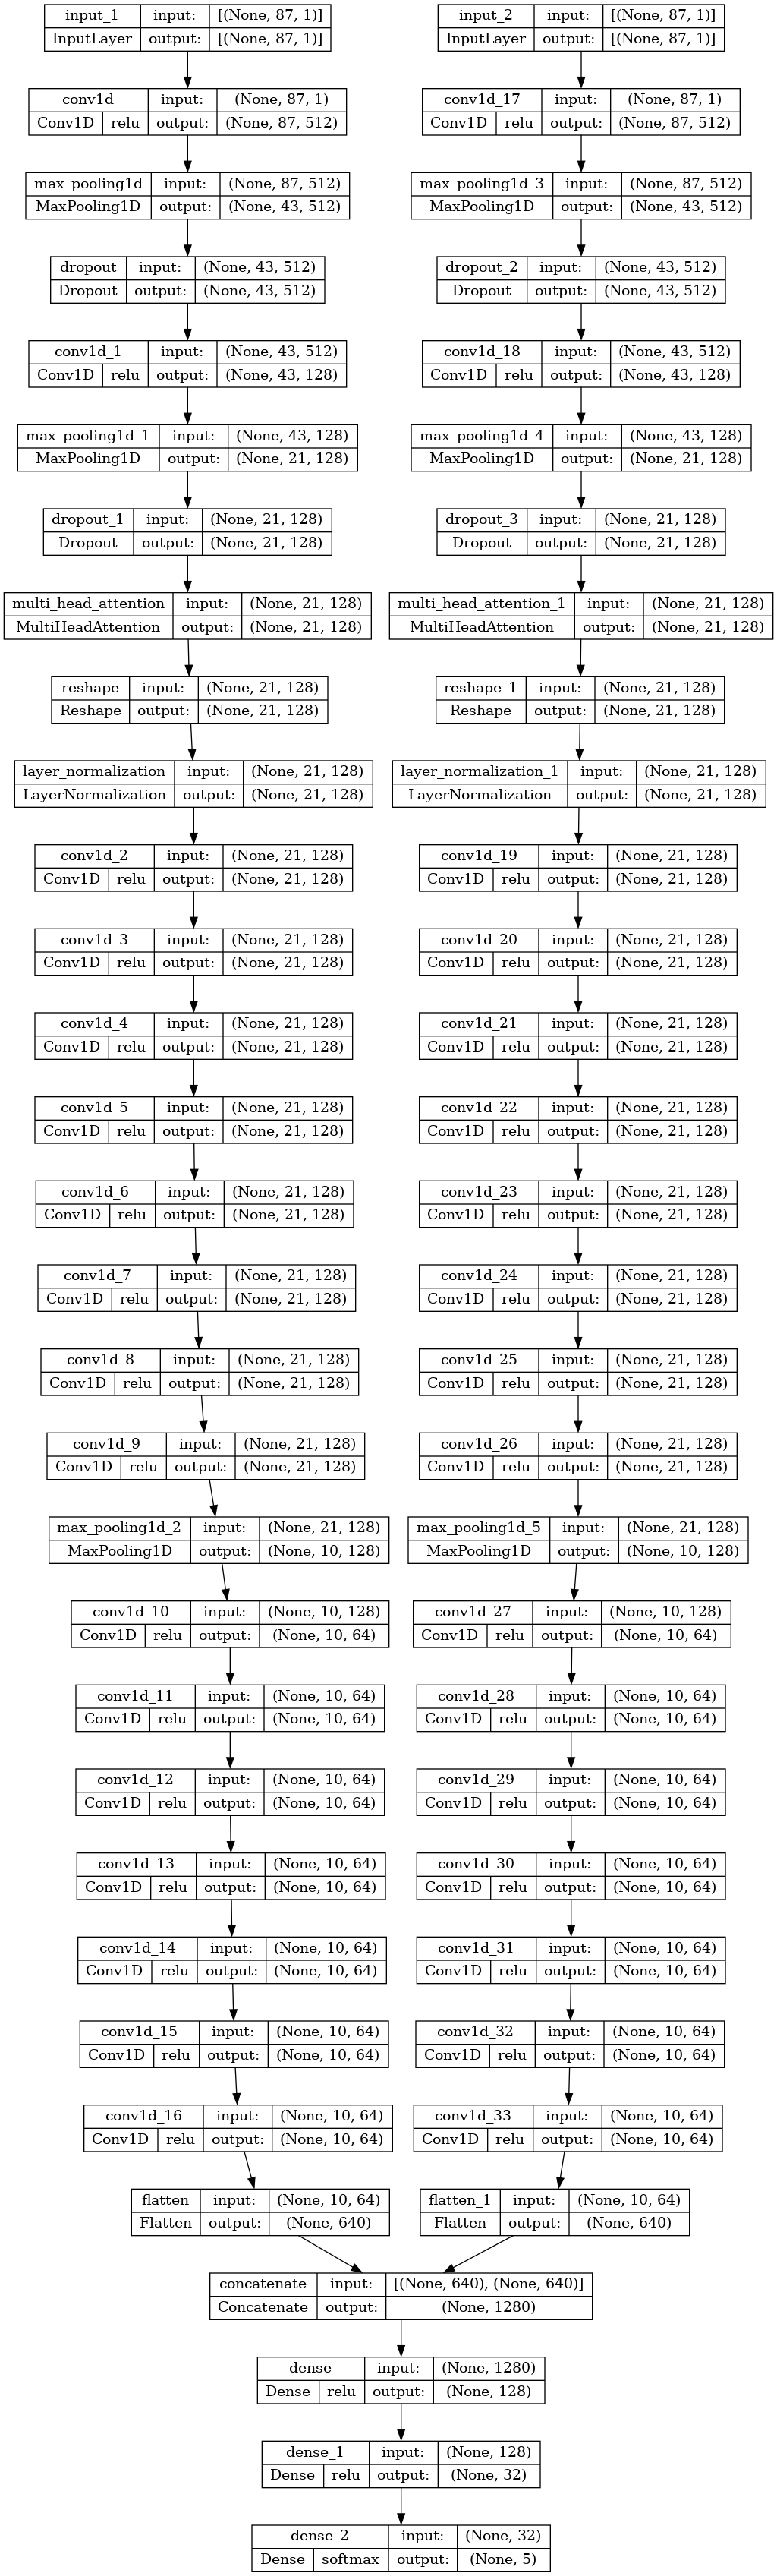

In [21]:
keras.utils.vis_utils.plot_model(model,to_file='binary_model.png',show_shapes=True, show_layer_names=True, show_layer_activations = True)

In [22]:
optimizer = tf.keras.optimizers.experimental.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-08,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=100,
    jit_compile=True
)
# train_op = tf.keras.optimizers.adam(amsgrad=True)
# model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = optimizer ,loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

filepath = '/kaggle/working/multi_model_with_att_large_one_hot_rmsprop.hdf5'
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max',factor=0.2, patience=5, min_lr=0.001, cooldown = 1, focus='val_accuracy')
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max',factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('training.log')

callbacks_list = [checkpoint, reduce_lr, csv_logger]

In [24]:
history = model.fit([x_train, x_train], Y_train, epochs = 150, validation_data=([x_test, x_test], Y_test),batch_size = 512, callbacks= callbacks_list)

Epoch 1/150
247/247 [==============================] - ETA: 0s - loss: 1.0038 - accuracy: 0.5295
Epoch 1: val_accuracy improved from -inf to 0.54471, saving model to /kaggle/working/multi_model_with_att_large_one_hot_rmsprop.hdf5
247/247 [==============================] - 58s 155ms/step - loss: 1.0038 - accuracy: 0.5295 - val_loss: 1.2849 - val_accuracy: 0.5447 - lr: 0.0010
Epoch 2/150
246/247 [============================>.] - ETA: 0s - loss: 0.5041 - accuracy: 0.8417
Epoch 2: val_accuracy did not improve from 0.54471
247/247 [==============================] - 37s 152ms/step - loss: 0.5041 - accuracy: 0.8417 - val_loss: 2.2753 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/150
246/247 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.9091
Epoch 3: val_accuracy improved from 0.54471 to 0.76912, saving model to /kaggle/working/multi_model_with_att_large_one_hot_rmsprop.hdf5
247/247 [==============================] - 38s 154ms/step - loss: 0.2695 - accuracy: 0.9091 - v

In [25]:
model = load_model('/kaggle/working/multi_model_with_att_large_one_hot_rmsprop.hdf5')

In [26]:
test_loss, test_acc = model.evaluate([x_21_test, x_21_test], y_21_test)

print(test_loss)
print(test_acc)

371/371 [==============================] - 4s 9ms/step - loss: 0.0046 - accuracy: 0.9994
0.004590807016938925
0.9994092583656311


In [27]:
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

In [28]:
accuracy

[0.5294547080993652,
 0.8416962623596191,
 0.9090519547462463,
 0.9571336507797241,
 0.9755979180335999,
 0.9825041890144348,
 0.9646114706993103,
 0.9902042746543884,
 0.9919744729995728,
 0.9938240647315979,
 0.9927603602409363,
 0.995578408241272,
 0.9968008995056152,
 0.9961102604866028,
 0.9972216486930847,
 0.9970867037773132,
 0.996697723865509,
 0.9974042177200317,
 0.9975867867469788,
 0.9975788593292236,
 0.997602641582489,
 0.9967294335365295,
 0.9979439973831177,
 0.9983091354370117,
 0.9984044432640076,
 0.9983806014060974,
 0.9983488321304321,
 0.998539388179779,
 0.9980868697166443,
 0.9988727569580078,
 0.9988806843757629,
 0.9987537264823914,
 0.9986346364021301,
 0.998991847038269,
 0.9986822605133057,
 0.9990077018737793,
 0.9980948567390442,
 0.9992220401763916,
 0.9990633130073547,
 0.9992458820343018,
 0.9991823434829712,
 0.9990156888961792,
 0.9991426467895508,
 0.9991267919540405,
 0.9991188645362854,
 0.9993172883987427,
 0.9993332028388977,
 0.999364972114563

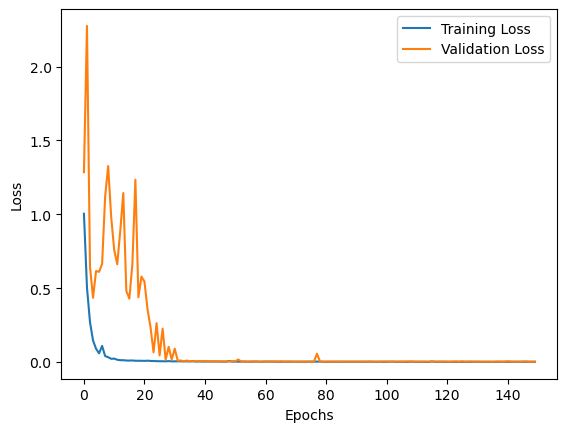

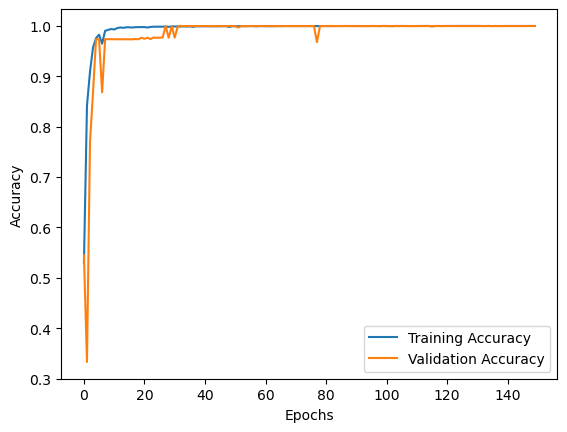

In [29]:
import matplotlib.pyplot as plt

# Load the log file and extract the data
log_data = pd.read_csv('training.log')
loss = log_data['loss']
val_loss = log_data['val_loss']
acc = log_data['accuracy']
val_acc = log_data['val_accuracy']

# Plot the loss curves
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


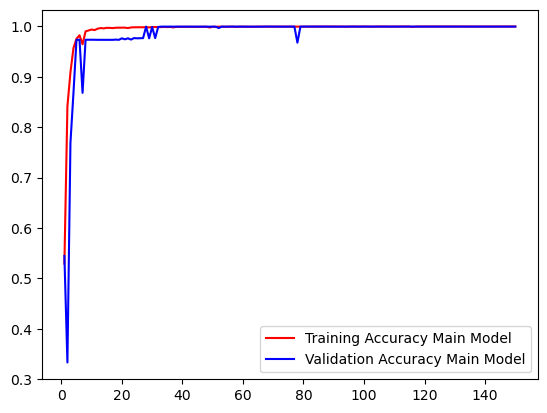

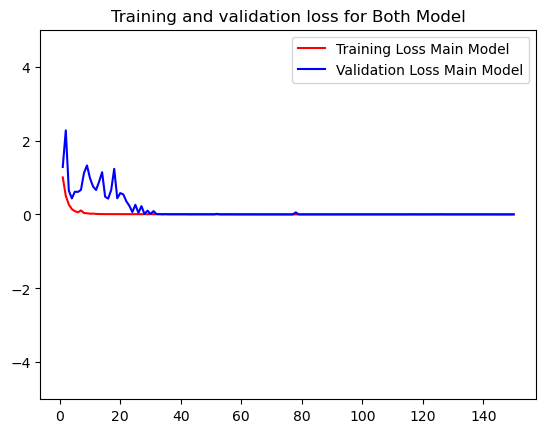

In [30]:
import matplotlib.pyplot as plt
main_acc = history.history['accuracy']

main_val_acc = history.history['val_accuracy']


main_loss = history.history['loss']

main_val_loss = history.history['val_loss']


epochs = range(1, len(main_acc) + 1)

plt.plot(epochs, main_acc, 'r', label='Training Accuracy Main Model')


plt.plot(epochs, main_val_acc, 'b', label='Validation Accuracy Main Model')
plt.legend()
plt.grid(False)
plt.savefig('Net_aaccuracy.png', bbox_inches='tight',dpi=600)

plt.figure()

plt.plot(epochs, main_loss, 'r', label='Training Loss Main Model')

plt.plot(epochs, main_val_loss, 'b', label='Validation Loss Main Model')

plt.ylim([-5, 5])
plt.title('Training and validation loss for Both Model')

plt.legend()
plt.grid(False)
plt.savefig('Net_loss.png', bbox_inches='tight',dpi=600)
plt.show()

# **Confusion Matrix**

371/371 [==============================] - 3s 7ms/step
[[2151    1    0    0    0]
 [   0 2402    0    0    0]
 [   0    0 4342    0    0]
 [   0    0    0   67    0]
 [   0    0    1    5 2881]]


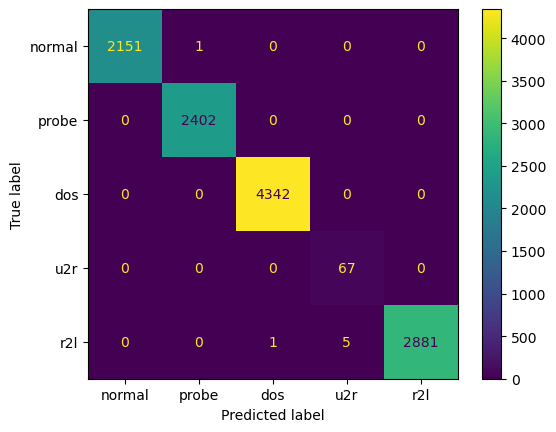

In [31]:
# Convert DataFrame to NumPy array
y_21_test_array = y_21_test.to_numpy()

# Reshape the one-hot encoded labels
Y_test_reshaped = y_21_test_array.reshape(-1, 5)

# Obtain the predicted values
Y_pred = model.predict([x_21_test, x_21_test])

# Convert the one-hot encoded labels to scalar values
Y_test_scalar = np.argmax(Y_test_reshaped, axis=1)
Y_pred_scalar = np.argmax(Y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test_scalar, Y_pred_scalar)

# Print the confusion matrix
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal","probe","dos","u2r","r2l"])
disp.plot()
plt.savefig('confusion_Net.png', bbox_inches='tight',dpi=600)
plt.grid(False)
plt.show()

In [32]:
CM = ConfusionMatrix(actual_vector=Y_test_scalar, predict_vector=Y_pred_scalar)
CM.relabel(mapping={0:"normal",1:"probe",2:"dos",3:"u2r",4:"r2l"})

In [33]:
print(CM)

Predict      normal       probe        dos          u2r          r2l          
Actual
normal       2151         1            0            0            0            

probe        0            2402         0            0            0            

dos          0            0            4342         0            0            

u2r          0            0            0            67           0            

r2l          0            0            1            5            2881         





Overall Statistics : 

95% CI                                                            (0.99897,0.99985)
ACC Macro                                                         0.99976
ARI                                                               0.99904
AUNP                                                              0.99967
AUNU                                                              0.99968
Bangdiwala B                                                      0.99929
Bennett S                        

In [34]:
from sklearn.metrics import classification_report
target_names = ['normal','probe','dos','u2r','r2l']
print(classification_report(Y_test_scalar, Y_pred_scalar, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      2152
       probe       1.00      1.00      1.00      2402
         dos       1.00      1.00      1.00      4342
         u2r       0.93      1.00      0.96        67
         r2l       1.00      1.00      1.00      2887

    accuracy                           1.00     11850
   macro avg       0.99      1.00      0.99     11850
weighted avg       1.00      1.00      1.00     11850



In [35]:
acc_21 = accuracy_score(Y_test_scalar, Y_pred_scalar)* 100
recall = recall_score(Y_test_scalar, Y_pred_scalar , average="weighted")
precision = precision_score(Y_test_scalar, Y_pred_scalar , average="weighted")
f1 = f1_score(Y_test_scalar, Y_pred_scalar, average="weighted")

In [36]:
print("accuracy")
print("%.3f" %acc_21)
print("racall")
print("%.3f" %recall)
print("precision")
print("%.3f" %precision)
print("f1score")
print(f1)

accuracy
99.941
racall
0.999
precision
0.999
f1score
0.9994166120525405


In [37]:
# data = pd.read_csv('/content/training.log', sep=',', header=None)
# data.to_csv('training.csv', index=False)

In [38]:
# from google.colab import files
# files.download('training.csv')